# Attention !!!
- Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.
- Only TODO 1, 2, 3, 4, 5, 6, 10, 11 will be graded.
- **Extra credit:** 1% of total grade for Com Eng Math 2 for TODO 7, 8, 9 (1/3 each.)

# Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.

TODO#1: Write functions that samples from the following distribution
1. $\mathcal{N}(0,1)$
2. $Bernoulli(0.3)$
3. $B(10, 0.3)$
4. $Multinomial(n=10, p=[0.3,0.2,0.5])$
5. $U(0,1)$
<!-- 6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(b, K):\frac{(b-a)K}{2}=1$. -->
6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(\frac{a+b}{2}, K):\frac{(b-a)K}{2}=1$.

Capture screenshot of the histogram for each of the distribution and paste them on the pdf file. The example is shown below.

Hint: see scipy.stats for common distributions.
[plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) should be helpful for plotting histograms

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom, multinomial, uniform, expon, triang


def sample_normal(sample_size=10, mu=0, std=1):
    # TODO#1.2:
    samples = norm.rvs(loc=mu, scale=std, size=sample_size)
    return samples


def sample_bernoulli(sample_size=10, p=0.5):
    # TODO#1.2:
    samples = bernoulli.rvs(p, size=sample_size)
    return samples


def sample_binomial(sample_size=10, n=10, p=0.5):
    # TODO#1.3:
    samples = binom.rvs(n, p, size=sample_size)
    return samples


def sample_multinomial(sample_size=10, n=100, p=[0.3, 0.2, 0.5]):
    # TODO#1.4:
    samples = multinomial.rvs(n, p, size=sample_size)
    return samples


def sample_uniform(sample_size=10, from_x=0, to_x=1):
    # TODO#1.5:
    samples = uniform.rvs(loc=from_x, scale=to_x - from_x, size=sample_size)
    return samples


def sample_triangle(sample_size=10, a=0, b=1):
    # TODO#1.6:
    samples = triang.rvs(c=0.5, loc=a, scale=b - a, size=sample_size)
    return samples

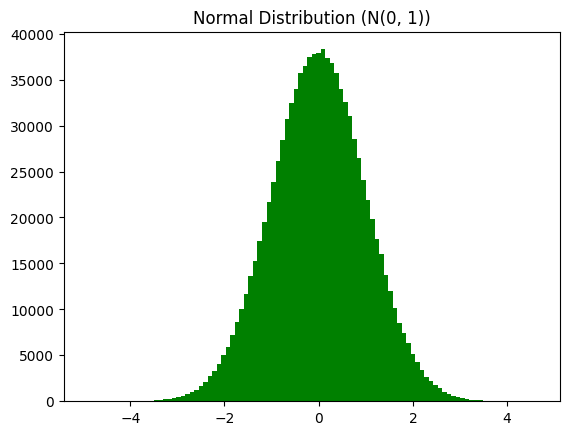

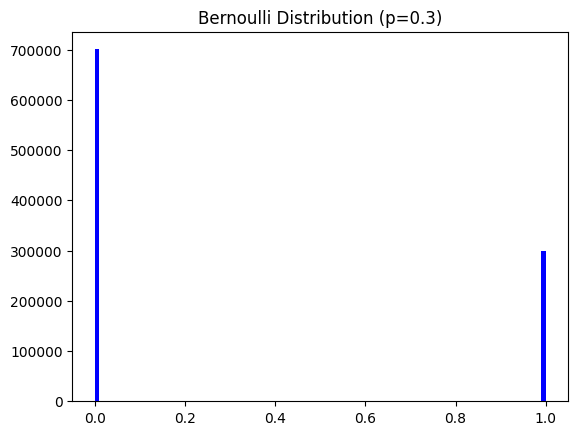

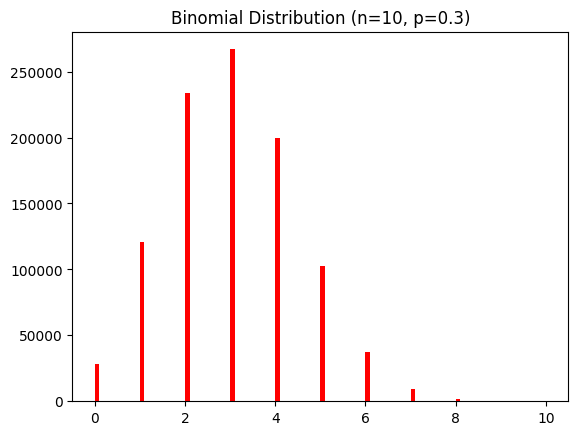

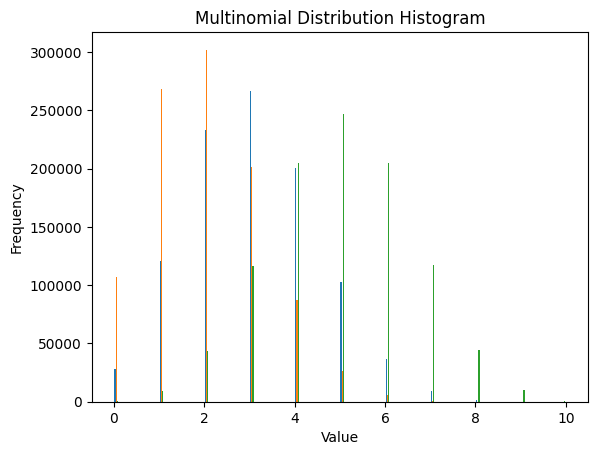

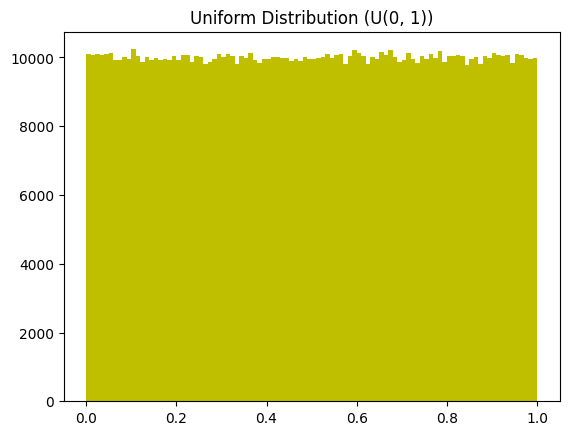

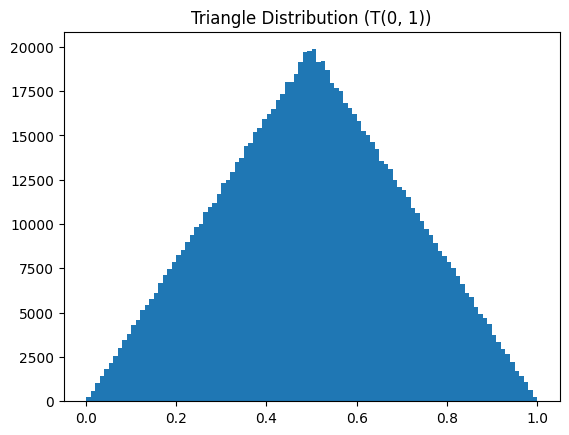

In [21]:
# Use this code block to show your sampling result.
sample_size = 1000000
# s = sample_triangle(sample_size, -0.01, 0.02)
# count, bins, ignored = plt.hist(s, 100, density=False)
# plt.show()
# Normal distribution

normal_samples = sample_normal(sample_size)
plt.hist(normal_samples, 100, density=False, color='g')
plt.title('Normal Distribution (N(0, 1))')
plt.show()

# Bernoulli distribution
bernoulli_samples = sample_bernoulli(sample_size, p=0.3)
plt.hist(bernoulli_samples, 100, density=False, color='b')
plt.title('Bernoulli Distribution (p=0.3)')
plt.show()

# Binomial distribution
binomial_samples = sample_binomial(sample_size, n=10, p=0.3)
plt.hist(binomial_samples, 100, density=False, color='r')
plt.title('Binomial Distribution (n=10, p=0.3)')
plt.show()

# Multinomial distribution (discrete distribution, so no histogram)
multinomial_samples = sample_multinomial(sample_size, n=10, p=[0.3, 0.2, 0.5])
plt.hist(multinomial_samples, 100, density=False)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Multinomial Distribution Histogram")
plt.show()

# Uniform distribution
uniform_samples = sample_uniform(sample_size)
plt.hist(uniform_samples, 100, density=False, color='y')
plt.title('Uniform Distribution (U(0, 1))')
plt.show()

# Triangle distribution
triangle_samples = sample_triangle(sample_size, a=0, b=1)
plt.hist(triangle_samples, 100, density=False)
plt.title('Triangle Distribution (T(0, 1))')
plt.show()

# Law of large number

### Law of large number

**TODO#2:** Using a sampling function from TODO#1.1, Plot the graph that shows the relation between an empirical mean and sampling size from 1 up to 10000.
What does the graph imply about the difference between the empirical mean and the theoritical mean?

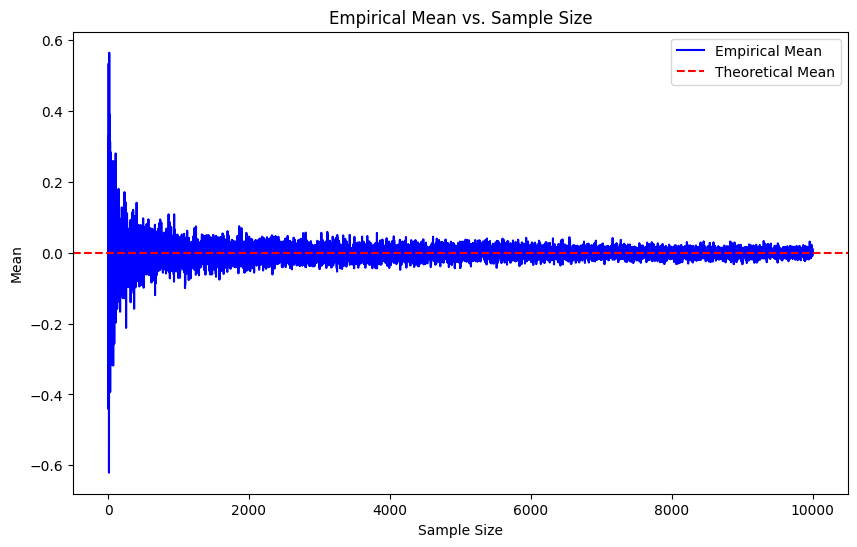

In [25]:
sample_sizes = np.arange(1, 10001)  # Sample sizes from 1 to 10000
empirical_means = []  # List to store empirical means

# Calculate empirical means for different sample sizes
for size in sample_sizes:
    samples = sample_normal(sample_size=size)
    empirical_mean = np.mean(samples)
    empirical_means.append(empirical_mean)

# Theoretical mean of the normal distribution (N(0, 1)) is 0
theoretical_mean = 0

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, empirical_means, color='b', label='Empirical Mean')
plt.axhline(y=theoretical_mean, color='r', linestyle='--', label='Theoretical Mean')
plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.title('Empirical Mean vs. Sample Size')
plt.legend()
plt.show()


### Law of large number for histogram

The histogram is used to approximate the PDF of an unknown distribution.
The bin in the histogram represents the frequency of the event happening inside the bin range.

**TODO#3:** Given a fix bin number of 40. Plot the histogram of the data sampling from the function, `sample_normal(n, 0, 1)`, for different sizes of sample: 500, 1k, 5k and 10k.
Compare and explain the relation between the approximation given by the histogram and the true PDF for each of the sample size.

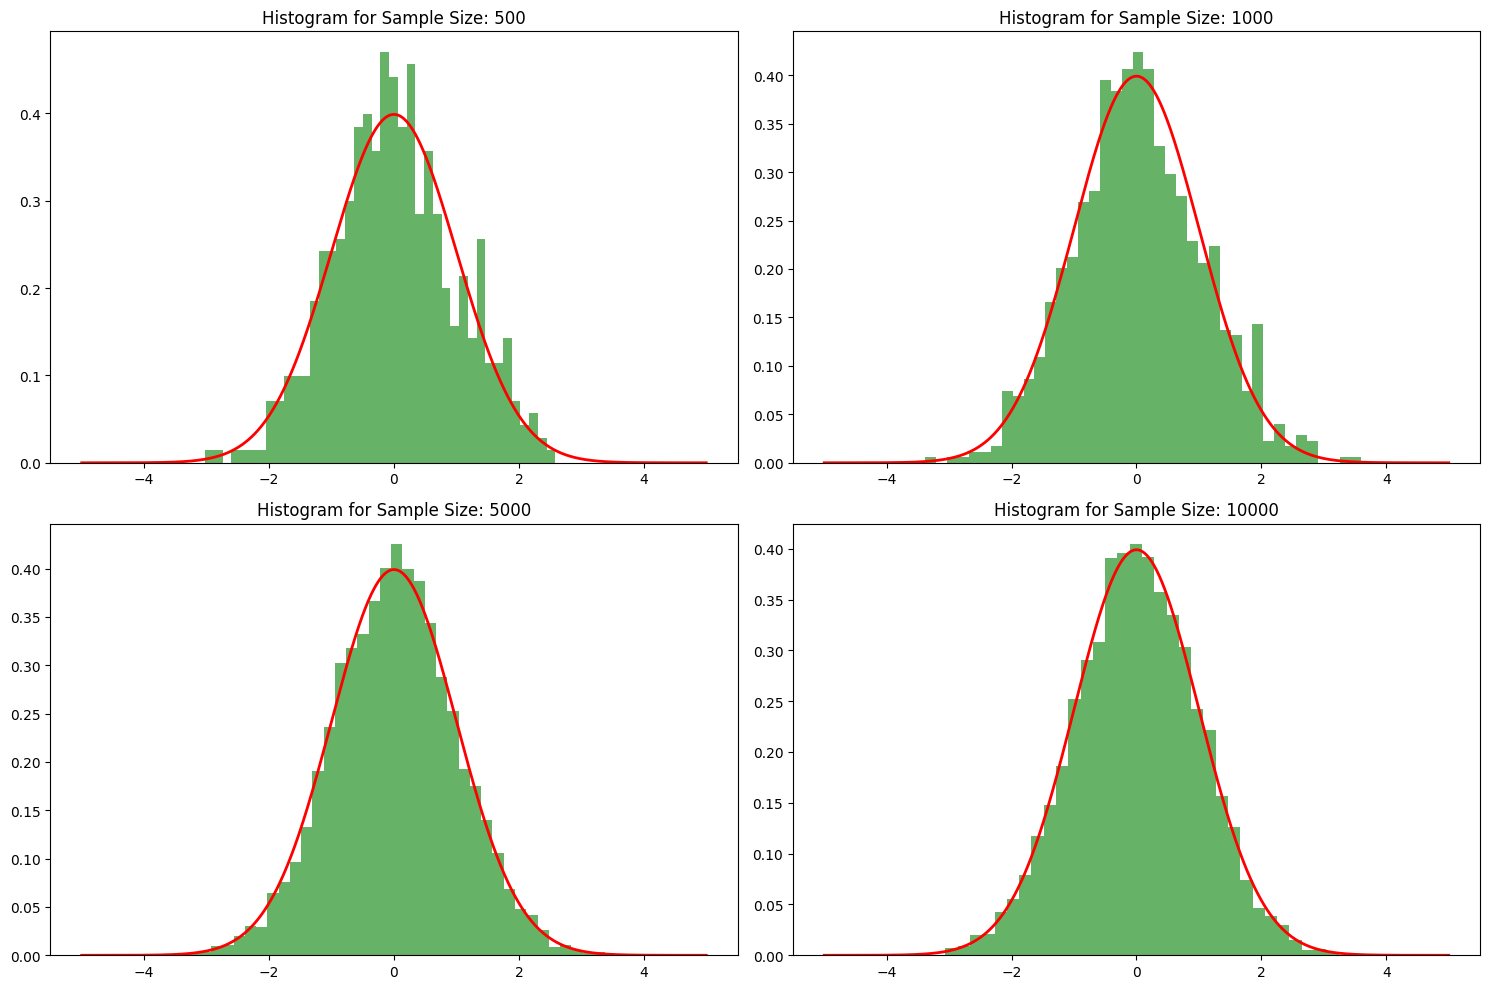

In [ ]:
sample_sizes = [500, 1000, 5000, 10000]
num_bins = 40

plt.figure(figsize=(15, 10))

for idx, size in enumerate(sample_sizes, 1):
    # Generate samples
    samples = sample_normal(sample_size=size)

    # Plot histogram
    plt.subplot(2, 2, idx)
    plt.hist(samples, bins=num_bins, density=True, alpha=0.6, color='g')
    plt.title(f'Histogram for Sample Size: {size}')

    # Plot true PDF (normal distribution)
    x = np.linspace(-5, 5, 1000)
    pdf = norm.pdf(x, loc=0, scale=1)
    plt.plot(x, pdf, 'r', linewidth=2)

plt.tight_layout()
plt.show()

## Central limit theorem

In this part we will use the Central Limit Theorem to approximate the true probabity of getting more than 40 heads when an unfair coin, with the probability 0.3 of being head, is tossed 100 times.


**TODO#4:** Simulate multiple coin tosses to construct a histrogram from the outcomes. Plot the histogram. Hint: x-axis should represents the number of heads when the coin is tossed 100 times. Does this histogram looks like a normal distribution?

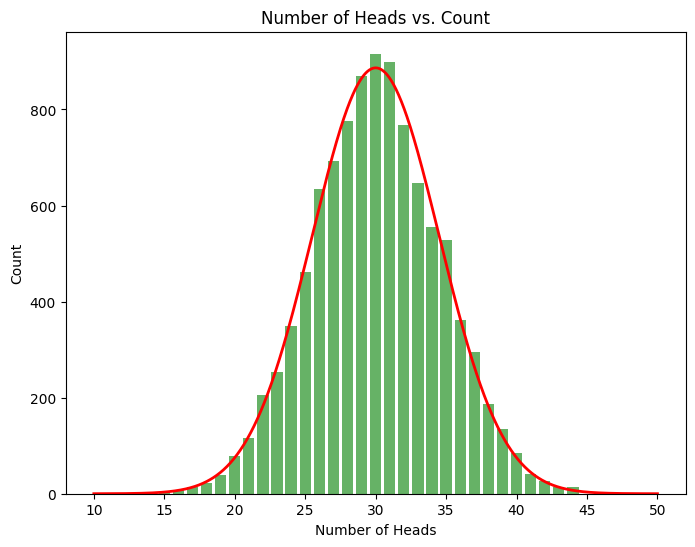

In [27]:
np.random.seed(0)  # Set seed for reproducibility
num_simulations = 10000
num_tosses = 100
probability_heads = 0.3

# Simulate coin tosses
tosses = np.random.choice([0, 1], size=(num_simulations, num_tosses), p=[1 - probability_heads, probability_heads])
num_heads = np.sum(tosses, axis=1)

# Count the occurrences of each number of heads
unique_heads, counts = np.unique(num_heads, return_counts=True)

# Plot the relationship between number of heads and count
plt.figure(figsize=(8, 6))
plt.bar(unique_heads, counts, color='g', alpha=0.6)
plt.title('Number of Heads vs. Count')
plt.xlabel('Number of Heads')
plt.ylabel('Count')

# Plot true PDF (normal distribution)
x = np.linspace(10, 50, 1000)
pdf = norm.pdf(x, loc=30, scale=4.5) * 10000
plt.plot(x, pdf, 'r', linewidth=2)
plt.show()


**TODO#5:** Use CLT to find the probability of getting more than 40 heads.

**TODO#6:** Compare and find the difference between CLT's approximation and the actual probability using the binomial distribution.

In [29]:
# Ans check
from scipy.stats import norm

sample_mean = np.mean(num_heads)
sample_std = np.std(num_heads)
clt_probability = 1 - norm.cdf(40, loc=sample_mean, scale=sample_std)

print(f"Probability of getting more than 40 heads using CLT: {clt_probability:.4f}")


Probability of getting more than 40 heads using CLT: 0.0143


In [30]:
# Ans check
from scipy.stats import binom

actual_probability = 1 - binom.cdf(40, num_tosses, probability_heads)

print(f"Actual probability of getting more than 40 heads: {actual_probability:.4f}")


Actual probability of getting more than 40 heads: 0.0125


In [31]:
# Ans check
print(f"The difference between CLT's approximation and the actual probability using the binomial distribution is: {clt_probability - actual_probability:.4f}")

The difference between CLT's approximation and the actual probability using the binomial distribution is: 0.0018


# Algebra of Random Variables

Given an independent random variable $X$ and $Y$, such that $X \sim F$ and $Y \sim U(3,5)$. The summation of those two is written as $Z = X + Y$ and the PDF of $F$ is defined below.
$$
F(X) =
\begin{cases}
0.1, & -2<=X<=0\\
0.4, & 0<X<=2 \\
\end{cases}
$$
**TODO#7:** Find $P( 3 < Z < 5 )$.

# Correlation

The correlation captures the linear relationshi between two sets of random variables. The higher magnitude of the correlation indicates a stronger relationship.


**TODO#8:** Find the correlation of $X$ and $Y = X + A$, given that $X \sim U(-1,1)$ and
1. $A = 10$
2. $A \sim U(-1,1)$
3. $A \sim U(-10,10)$
4. $A \sim U(-100,100)$


**TODO#9:** From the results in TODO#8, answer following questions
1. Does the correlation decrease as we increase the randomness of A ?
2. Explain the result when we change from $A \sim U(-10,10)$ to $A \sim U(9090,10010)$. Hint: Compare the result with $A$ and $A + 10000: A \sim U(-10,10) $

# Hamtaro and his cloud storage empire.



After the success in the manufacturing business. Hamtaro wants to expand his business into a new sector.
Since cloud computing is currently booming, he decides to enter into the cloud storage business.

The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
<!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

**TODO#10:** Answer the following questions.
1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.
2. What is the probability of failure at the temperature used in part 1?
<!-- 3. If Hamtaro want to handle 10k concurrent requests, what is the minimum disks should Hamtoro has to make 99.99% of disk availability and how should he split the workloads? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to be read at the same time. -->
3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

**Hint:** `scipy.integrate.quad` can help you do integration.

In [33]:
from scipy.stats import binom

sample_size = 1000000
final_answer = 0
disk_num = 0

while True:
    prob = (1.144 * (10 ** (-3))) ** disk_num
    binomm = binom.rvs(n=10000, p=prob, size=sample_size)
    answer = 0

    for e in binomm:
        if e > 1:
            answer += 1

    prob_answer = answer / len(binomm)

    if prob_answer < 0.01 / 100:
        final_answer = disk_num
        break

    disk_num += 1

print("Final Answer:", final_answer)


Final Answer: 2


# Moontaro
![picture](https://i.redd.it/mcveltqx2j071.png)

Recently, cryptocurrency investment has become extremely popular due to its extraordinarily high rates of return. Though many people consider it a risky investment, Hamtaro does not want to miss this opportunity and start gathering information about these coins. His research suggests that four coins, namely $a$, $b$, $c$, and $d$, have a promising future to go to the moon.


Hamtaro wants to run simulations to validate his chances. As the value of the coins is non-deterministic, he models it sequentially based on their historical values (a.k.a. autoregressive model). The price of coin $i$ at day $t$ is formulated as

$p_{i,t} = p_{i,t-1} \times r_{i,t}$, where $i \in \{a, b, c, d\}$, and  $p_{i, 0} = 10$.

The rates $r_{i,t}$, are drawn from a multivariant guassian distribution $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, where $\mu = [1.003, 1.002, 1.004, 1.004]^T$ and $\mathbf{\Sigma}$ as given below:

$\mathbf{\Sigma}$ | a | b | c | d
--- | --- | --- | --- |---
a |  10 x 10$^{-3}$ | 0 | 4 x 10$^{-3}$ | 5 x 10$^{-3}$
b |  0  | 3 x 10$^{-3}$ | 0 | 0
c |  4 x 10$^{-3}$  | 0 | 12 x 10$^{-3}$| 2 x 10$^{-3}$
d |  5 x 10$^{-3}$  | 0 | 2 x 10$^{-3}$ | 15 x 10$^{-3}$


<!-- 1. Are $p_{a,t}$ and $p_{b,t}$ independent ? Why ?
2. Are $p_{a,t}$ and $p_{c,t}$ independent ? Why ?
3. Are $p_{a,t}$ and $p_{d,t}$ independent ? Why ? -->

**TODO11:**
1. Which pairs of coins are independent? Why?
2. Given the following definitions:
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$.
  hint: you should write reusable functions to make your life easier.
3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.
4. How can the expected return be positive while having around 50\% chance of profitability?

After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  |
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).
6. Which strategy yields the highest return?
7. Which strategy is the safest one?
8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).
9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

In [11]:
import numpy as np
from scipy.stats import multivariate_normal

# Constants
mu = np.array([1.003, 1.002, 1.004, 1.004])
cov_matrix = np.array([ [10e-3, 0, 4e-3, 5e-3],
                                    [0, 3e-3, 0, 0],
                                    [4e-3, 0, 12e-3, 2e-3],
                                    [5e-3, 0, 2e-3, 15e-3]])

# Autoregressive model simulation function
def simulate_autoregressive_model(days, initial_prices):
    # Simulate rates of change
    rates = multivariate_normal.rvs(mean=mu, cov=cov_matrix, size=days)

    # Initialize prices
    prices = np.zeros((days + 1, len(initial_prices)))
    prices[0] = initial_prices

    # Simulate prices based on autoregressive model
    for t in range(1, days + 1):
        prices[t] = prices[t - 1] * rates[t - 1]

    return prices

# Function to calculate returns
def calculate_returns(prices):
    return prices[-1] - prices[0]

# Function to simulate expected return for a given coin and time point
def simulate_expected_return(coin_index, days, num_simulations=10000):
    initial_prices = np.ones(4) * 10  # Initial prices for all coins

    # Simulate prices
    prices = simulate_autoregressive_model(days, initial_prices)

    # Simulate returns
    returns = np.array([calculate_returns(simulate_autoregressive_model(days, initial_prices))[coin_index] for _ in range(num_simulations)])

    # Calculate expected return
    expected_return = np.mean(returns)

    return expected_return

# Simulate expected returns for each coin at T = 30 and T = 180
for time_point in [30, 180]:
    for coin_index, coin_name in enumerate(['a', 'b', 'c', 'd']):
        expected_return = simulate_expected_return(coin_index, time_point)
        print(f"Expected Return for Coin {coin_name} at T = {time_point}: {expected_return}")


Expected Return for Coin a at T = 30: 0.9238075062686246
Expected Return for Coin b at T = 30: 0.6029302968993101
Expected Return for Coin c at T = 30: 1.1768270411037562
Expected Return for Coin d at T = 30: 1.3024369518882137
Expected Return for Coin a at T = 180: 7.071605193116977
Expected Return for Coin b at T = 180: 4.433835438959435
Expected Return for Coin c at T = 180: 9.276078307396777
Expected Return for Coin d at T = 180: 11.133958815935367


In [14]:
import numpy as np
from scipy.stats import multivariate_normal

# Constants
mu = np.array([1.003, 1.002, 1.004, 1.004])
cov_matrix = np.array([[10e-3, 0, 4e-3, 5e-3],
                       [0, 3e-3, 0, 0],
                       [4e-3, 0, 12e-3, 2e-3],
                       [5e-3, 0, 2e-3, 15e-3]])

# Autoregressive model simulation function
def simulate_autoregressive_model(days, initial_prices):
    rates = multivariate_normal.rvs(mean=mu, cov=cov_matrix, size=days)
    prices = np.zeros((days + 1, len(initial_prices)))
    prices[0] = initial_prices

    for t in range(1, days + 1):
        prices[t] = prices[t - 1] * rates[t - 1]

    return prices

# Function to calculate returns
def calculate_returns(prices):
    return prices[-1] - prices[0]

# Function to simulate expected return, variance, and probability of profit for each strategy
def simulate_strategy(strategy, days, num_simulations=10000):
    initial_prices = np.ones(4) * 10

    # Apply strategy to determine the amounts to buy for each coin
    amounts_to_buy = np.array(strategy[:4])

    # Simulate prices
    prices = simulate_autoregressive_model(days, initial_prices)

    # Calculate returns for each simulation
    returns = np.array([calculate_returns(simulate_autoregressive_model(days, initial_prices)) for _ in range(num_simulations)])

    # Apply strategy to calculate expected return, variance, and probability of profit
    strategy_returns = np.sum(returns[:, :4] * amounts_to_buy, axis=1)
    expected_return = np.mean(strategy_returns)
    variance_return = np.var(strategy_returns)
    probability_of_profit = np.mean(strategy_returns > 0)

    return expected_return, variance_return, probability_of_profit

# Define the investment strategies
strategies = [
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0.5, 0.5, 0, 0],
    [0.5, 0, 0.5, 0],
    [0.5, 0, 0, 0.5]
]

# Print table header
print("Strategy | T = 30 | T = 180")
print("---------|--------|--------|--------|--------|--------|--------")

# Simulate and fill the table
for i, strategy in enumerate(strategies):
    expected_return_30, variance_return_30, probability_of_profit_30 = simulate_strategy(strategy, 30)
    expected_return_180, variance_return_180, probability_of_profit_180 = simulate_strategy(strategy, 180)

    # Fill the table
    table_row = f"   {i + 1}    | {expected_return_30:.4f}  | {expected_return_180:.4f}  | {variance_return_30:.4f}  | {variance_return_180:.4f}  | {probability_of_profit_30:.4f}  | {probability_of_profit_180:.4f}  "
    print(table_row)


Strategy | T = 30 | T = 180
---------|--------|--------|--------|--------|--------|--------
   1    | 0.9199  | 7.0140  | 42.0449  | 1239.0167  | 0.4569  | 0.3983  
   2    | 0.6540  | 4.5906  | 10.7169  | 155.9407  | 0.5265  | 0.5544  
   3    | 1.2676  | 10.5016  | 52.3667  | 2375.8565  | 0.4630  | 0.4129  
   4    | 1.3040  | 9.3178  | 73.6345  | 3185.5091  | 0.4398  | 0.3518  
   5    | 0.8642  | 5.6899  | 13.3928  | 353.6537  | 0.5259  | 0.5499  
   6    | 1.0544  | 8.5897  | 31.8701  | 1168.5708  | 0.4902  | 0.4529  
   7    | 1.1072  | 7.7461  | 37.6973  | 1162.4972  | 0.4771  | 0.4279  
